## Develop a code that sample a random Lorenz-distributed value

Let's use ```numpy.random``` [library](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html) in order to sample ```standard_cauchy``` distribution.

I will create a function called ```generate_lorenz``` in order to sample ```size``` of random values



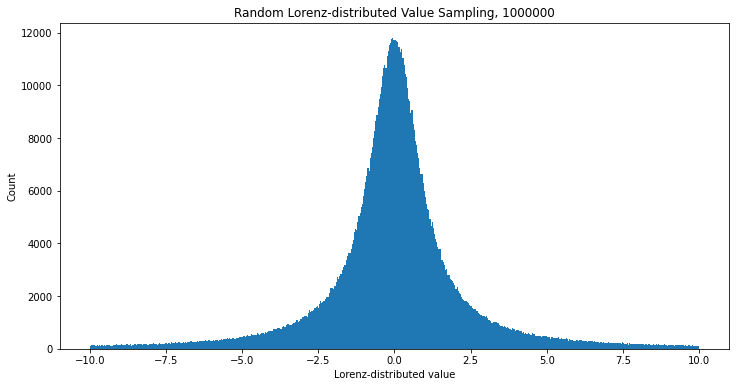

In [259]:
import numpy as np
import matplotlib.pyplot as plt

def generate_lorenz(size=1000):
    return np.random.standard_cauchy(size)

size = 1_000_000
data = generate_lorenz(size)
# Let's crop the data in order to clearly see it
data = data[(data > -10) & (data < 10)] 

plt.figure(figsize=(12, 6))
plt.hist(data, bins='auto')
plt.xlabel('Lorenz-distributed value')
plt.ylabel('Count')
plt.title(f'Random Lorenz-distributed Value Sampling, {size}')
plt.show()

In order to see the distribution let me use ```density=True``` parameter inside ```hist``` visualization


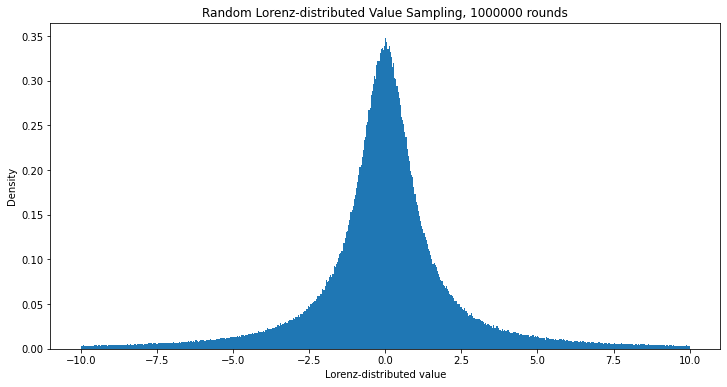

In [258]:
plt.figure(figsize=(12, 6))
plt.hist(data, density=True, bins='auto')
plt.xlabel('Lorenz-distributed value')
plt.ylabel('Density')
plt.title(f'Random Lorenz-distributed Value Sampling, {size} rounds')
plt.show()

## Let x be a Poisson random variable. What can you say about the distribution of the arithmetic mean of one thousand x?

We know that Poisson distribution can be expressed as follows: $$f(k, \lambda) = \frac{\lambda^k \cdot e^{-\lambda}}{k!}$$

$ \mathbb{E}[X] = \lambda $ which means that the mean of 1000 Poisson variables is going to be close enough to $ \lambda $

In [ ]:
!pip3 install tqdm

  0%|          | 0/5000000 [00:00<?, ?it/s]

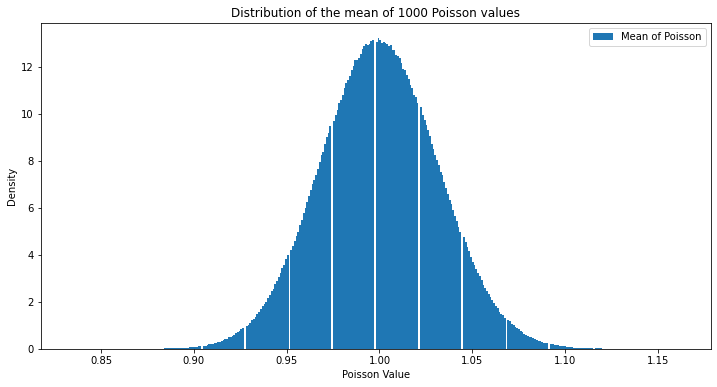

In [250]:
from tqdm.notebook import tqdm

means = []
for _ in tqdm(range(5_000_000)):
    means.append(np.random.poisson(size=1000).mean())

plt.figure(figsize=(12, 6))
plt.hist(means, density=True, bins='rice', label='Mean of Poisson')
plt.xlabel('Poisson Value')
plt.ylabel('Density')
plt.title('Distribution of the mean of 1000 Poisson values')
plt.legend()
plt.show()

We can see that it looks like normal distribution with the $ \mathbb{E} $ = 1.00 = $ \lambda $

By 68-95-99.7 rule we can estimate the standart deviation as approximately 0.03

Let's generate 1.000.000 samples $ ~ N(1.00, 0.03) $

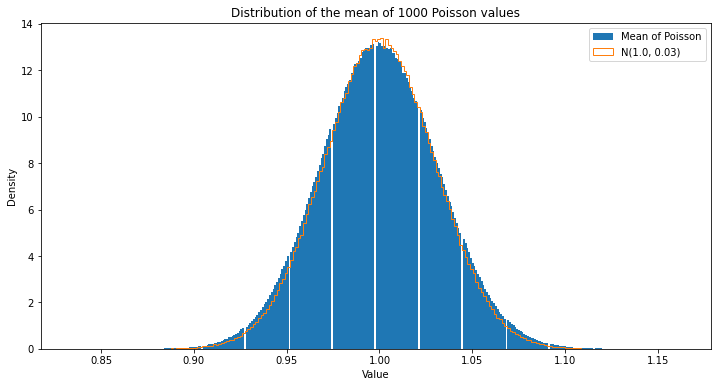

In [261]:
normal = np.random.normal(loc=1.0, scale=0.03, size=1_000_000)

plt.figure(figsize=(12, 6))
plt.hist(means, density=True, bins='rice', label='Mean of Poisson')
plt.hist(normal, density=True, bins='rice', histtype='step', label='N(1.0, 0.03)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of the mean of 1000 Poisson values')
plt.legend()
plt.show()

We can see that it looks really close to the distribution of the mean

However, there're some strange white spaces being present on the picture. I do not know how to explain them properly, however, the more data we sample, the less spaces we see

## How will the result change for Lorenz-distributed x?

We know that Lorenz-distributed value by definition is a ratio of two independent normally distributed random variables with mean zero.
That's mean Lorenz-distributed value has no expected value

However, we can try to generate some data and see what happens. Let's generate 1000 Lorenz-distributed values using ```generate_lorenz()``` function from the previous task

  0%|          | 0/1000000 [00:00<?, ?it/s]

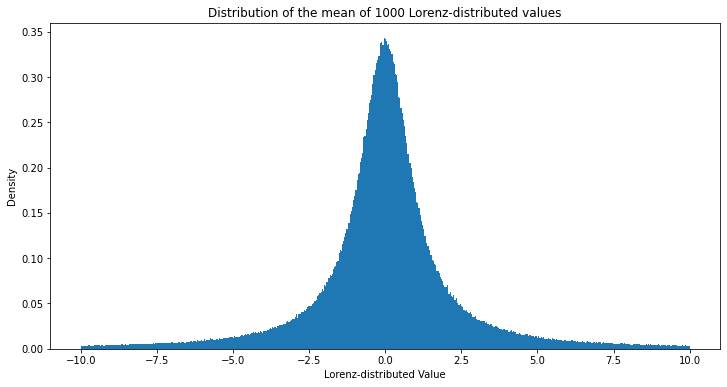

In [265]:
lmeans = []
for _ in tqdm(range(1_000_000)):
    lmeans.append(generate_lorenz().mean())

lmeans = np.array(lmeans)
lmeans = lmeans[(lmeans > -10) & (lmeans < 10)] 

plt.figure(figsize=(12, 6))
plt.hist(lmeans, bins='auto', density=True)
plt.xlabel('Lorenz-distributed Value')
plt.ylabel('Density')
plt.title('Distribution of the mean of 1000 Lorenz-distributed values')
plt.show()

We can see that the distribution looks absolutely the same as at the very first plot
